In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

In [3]:
df = pd.DataFrame({'A': [10,20,30,40,50],
                  'B':[10.5,20.5,30.5,40.5,50.5],
                  'C':[1.5,2.5,3.5,4.5,5.5]
                  })
df.profile_report()

In [5]:
def make_df(cols,ind):
    """Quickly make a DataFrame"""
    data = {c:[str(c) +str(i) for i in ind]
           for c in cols}
    # print(data)
    return pd.DataFrame(data, ind)
# example DataFrame
make_df('PQR', range(3))

,P,Q,R
0,P0,Q0,R0
1,P1,Q1,R1
2,P2,Q2,R2


In [6]:
make_df('abcde',range(6))

,a,b,c,d,e
0,a0,b0,c0,d0,e0
1,a1,b1,c1,d1,e1
2,a2,b2,c2,d2,e2
3,a3,b3,c3,d3,e3
4,a4,b4,c4,d4,e4
5,a5,b5,c5,d5,e5


In [7]:
# Recall: concatenate in numpy

In [8]:
x =[1,2,3]
y =[4,5,6]
z =[7,8,9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
x+y+z

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
x= [[1,2],
    [3,4]]
np.concatenate([x,x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [19]:
x= [[1,2],
    [3,4]]
np.concatenate([x,x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [20]:
# Concatenation in Pandas

In [25]:
ser1 = pd.Series(['A','B','C'], index = [1,2,3])
ser2 = pd.Series(['D','E','F'], index = [4,5,6])
ser1

1    A
2    B
3    C
dtype: object

In [26]:
ser2

4    D
5    E
6    F
dtype: object

In [31]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [36]:
df3 = make_df('AB',[0,1])
df4 = make_df('CD',[0,1])
pd.concat([df3,df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [37]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [39]:
pd.concat([df3, df4], axis='columns')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [40]:
pd.concat([df3, df4], axis=0, sort=True)

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1


In [41]:
x = make_df('AB', [0,1])
y = make_df('AB', [2,3])
y.index

Int64Index([2, 3], dtype='int64')

In [42]:
y.index = x.index  # make duplicate indices

In [43]:
pd.concat([x,y], sort=True)

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [44]:
Data = pd.concat([x,y])

In [45]:
Data

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [46]:
pd.concat([x,y], axis='columns')

,A,B,A,B
0,A0,B0,A2,B2
1,A1,B1,A3,B3


## Catching the repeats as an error

In [47]:
try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
    print("ValueError:",e)
    

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [48]:
pd.concat([x,y], ignore_index=True,sort=False)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [49]:
pd.concat([x,y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [52]:
df=pd.concat([x,y], keys=['Data1','Data2'])
df

A   B
Data1 0  A0  B0
      1  A1  B1
Data2 0  A2  B2
      1  A3  B3

In [53]:
df['A']["Data1"]

0    A0
1    A1
Name: A, dtype: object

In [56]:
df5 = make_df('ABC', [1,2])
df6 = make_df('BCD', [3,4])
pd.concat([df5,df6],sort=True)

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [57]:
pd.concat([df5,df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [58]:
pd.concat([df5,df6], join='outer',sort=False)

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [60]:
pd.concat([df5,df6], join_axes=[df5.columns])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [61]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [62]:
df1.append(df3)

,A,B
1,A1,B1
2,A2,B2
0,A0,B0
1,A1,B1


In [63]:
df1.append(df3,ignore_index=True)

,A,B
0,A1,B1
1,A2,B2
2,A0,B0
3,A1,B1


In [64]:
Data = pd.read_csv('Pandas/Data/Advertising.csv')
Data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [73]:
Data = Data.drop(['Unnamed: 0'],axis=1)
Data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [66]:
Data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [67]:
Data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [68]:
Data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [69]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [70]:
Data.ndim

2

In [71]:
Data.shape

(200, 5)

In [74]:
!pip install pandas_profiling

In [75]:
import pandas_profiling

In [76]:
pandas_profiling.ProfileReport(Data)

In [78]:
import seaborn as sns

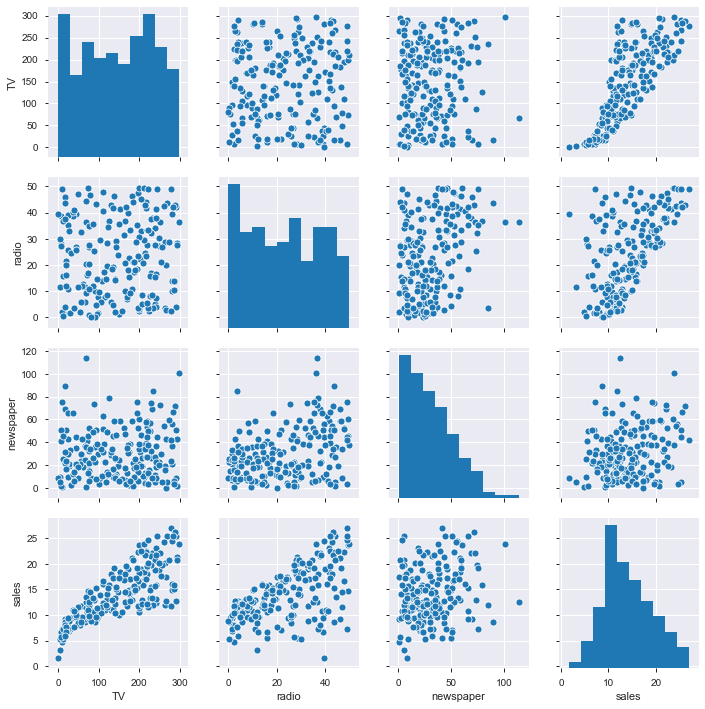

In [79]:
sns.pairplot(Data)

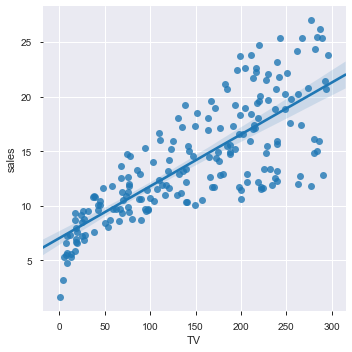

In [80]:
sns.lmplot(x='TV',y='sales',data=Data)

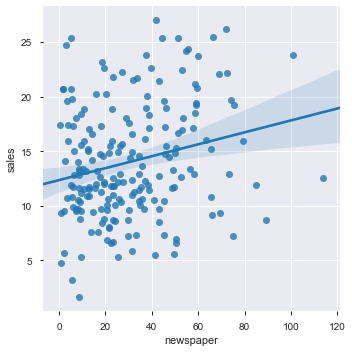

In [81]:
sns.lmplot(x='newspaper',y='sales',data=Data)

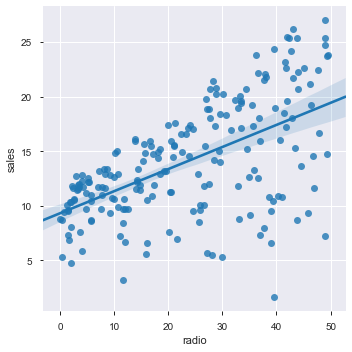

In [82]:
sns.lmplot(x='radio',y='sales',data=Data)